**2 Exploracion de datos**

In [1]:
%run cargar_datos.ipynb 


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

**2.1 Revision de nulos**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

Se eliminarán aquellos atributos que presenten un nivel muy alto de valores nulos, ya que requerirían un esfuerzo considerable para imputarlos y podrían introducir sesgos en el análisis. En el caso de promedio_ingresos_datacredito y tendencia_ingresos, ambas presentan alrededor del 30% de valores faltantes. Si bien este porcentaje podría justificar su eliminación, se ha decidido conservarlas temporalmente con el fin de evaluarlas en etapas posteriores y determinar si aportan valor predictivo o deben finalmente descartarse.

**2.1 Tipo de variables**

**Variables categóricas**

Ordinales

* tipo_credito (Politómico)
* fecha_prestamo (Politómico)

Nominales

* tipo_laboral  (Dicotómico)  
* tendencia_ingresos (Politómico)  

**Variables numéricas**

Continuas

* capital_prestado 
* salario_cliente  
* total_otros_prestamos 
* puntaje 
* puntaje_datacredito 
* saldo_mora 
* saldo_total 
* saldo_principal 
* Promedio_ingresos_datacredito


Discretas

* plazo_meses 
* edad_cliente 
* cuota_pactada 
* cant_creditosvigentes 
* huella_consulta 
* creditos_sectorFinanciero 
* creditos_sectorCooperativo 
* creditos_sectorReal 

**2.2 Unificar la forma como se representan los valores Nulos.**

In [3]:
!pip install numpy


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
df = df.replace(["NA", "N/A", "null", "NULL", "?", "Sin dato"], np.nan)

**2.3 Eliminacion variables irrelevantes**

In [5]:
df = df.drop(columns=["fecha_prestamo","plazo_meses"])

No era relevante para los objetivos iniciales de exploración, con cuota pactada y capital prestado se puede saber el plazo de pago. 

**2.4 Conversión del tipo de datos**

Se convierten las variables categoricas tipo object a category 

In [6]:
df["tipo_credito"] = df["tipo_credito"].astype("category")
df["tipo_laboral"] = df["tipo_laboral"].astype("category")
df["tendencia_ingresos"] = df["tendencia_ingresos"].astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   tipo_credito                   10763 non-null  category
 1   capital_prestado               10763 non-null  float64 
 2   edad_cliente                   10763 non-null  int64   
 3   tipo_laboral                   10763 non-null  category
 4   salario_cliente                10763 non-null  int64   
 5   total_otros_prestamos          10763 non-null  int64   
 6   cuota_pactada                  10763 non-null  int64   
 7   puntaje                        10763 non-null  float64 
 8   puntaje_datacredito            10757 non-null  float64 
 9   cant_creditosvigentes          10763 non-null  int64   
 10  huella_consulta                10763 non-null  int64   
 11  saldo_mora                     10607 non-null  float64 
 12  saldo_total                    1

In [8]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

**3 EDA**

**3.1 Analisis Univariable**


Para las variables numéricas realizamos un describe

In [9]:
#Variables numericas
df.describe()

,capital_prestado,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,1.076300e+04,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,10763.000000,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,10763.000000
mean,2.434315e+06,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,0.952523
std,1.909643e+06,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,3.977162,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06,0.212668
min,3.600000e+05,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.224831e+06,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,3.000000,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,1.000000
50%,1.921920e+06,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,1.000000
75%,3.084840e+06,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,8.000000,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,1.000000
max,4.144415e+07,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000


In [10]:
df_num = df.select_dtypes(include=["int64", "float64"])
df_num.agg(["mean", "median", "std", "var", "min", "max", "skew", "kurt"])

,capital_prestado,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
mean,2.434315e+06,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,0.952523
median,1.921920e+06,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,1.000000
std,1.909643e+06,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,3.977162,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06,0.212668
var,3.646735e+12,226.830012,1.263637e+17,1.402290e+16,4.430760e+10,271.110758,10999.401392,15.817819,9.392282,51055.715045,1.129327e+10,5.075485e+09,474.059899,7.555938,0.513330,3.328544,4.597234e+12,0.045228
min,3.600000e+05,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
max,4.144415e+07,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000
skew,3.723884e+00,1.934399,4.377666e+01,3.846389e+01,3.793301e+00,-4.865607,-5.644513,1.797738,1.487102,40.568483,2.019767e+01,5.050172e+00,94.971504,2.703071,4.218667,3.164866,4.280151e+00,-4.256468
kurt,3.531809e+01,7.868936,2.211230e+03,1.719281e+03,2.665076e+01,24.081011,39.437798,8.623346,3.998984,1845.712807,7.891667e+02,5.106384e+01,9279.824860,19.441771,29.351455,18.187208,3.277075e+01,16.120512


Para las variables categoricas un value_counts()

In [11]:
df.tipo_laboral.value_counts()

tipo_laboral
Empleado         6754
Independiente    4009
Name: count, dtype: int64

In [12]:
df.tipo_credito.value_counts()

tipo_credito
4     7747
9     2876
10     116
6       21
7        2
68       1
Name: count, dtype: int64

Eliminamos los tipo credito con pocos registros

In [13]:
df = df[~df['tipo_credito'].isin([7, 68])]
df['tipo_credito'] = df['tipo_credito'].cat.remove_unused_categories()

In [14]:
df.tipo_credito.value_counts()

tipo_credito
4     7747
9     2876
10     116
6       21
Name: count, dtype: int64

In [15]:
df.tendencia_ingresos.value_counts()

tendencia_ingresos
Creciente      5293
Decreciente    1291
Estable        1187
0                 7
8315              6
1000000           4
9147              2
-101368           1
-70715            1
-164315           1
-435177           1
-224714           1
-702927           1
-566272           1
5697              1
3978              1
-4105             1
-288              1
-28589            1
9090              1
10808             1
15090             1
24702             1
31837             1
52862             1
54683             1
15245             1
17181             1
22363             1
22832             1
82657             1
77975             1
75761             1
65988             1
86286             1
122727            1
146918            1
158042            1
417087            1
209090            1
173031            1
168750            1
2029000           1
1817052           1
1123000           1
4250635           1
Name: count, dtype: int64

Podemos ver que hay un problema de calidad de datos en la variable tendencia_ingresos por lo que tenemos que corregir esta variable dejando las categorias esperadas (Creciente, Decreciente, Estable) y eliminar los datos numericos que no corresponden a una variable categorica

In [16]:
categorias_validas = ["Creciente", "Decreciente", "Estable"]
df["tendencia_ingresos"] = df["tendencia_ingresos"].where(
    df["tendencia_ingresos"].isin(categorias_validas), 
    np.nan
)

df["tendencia_ingresos"] = df["tendencia_ingresos"].astype("category")
df["tendencia_ingresos"] = df["tendencia_ingresos"].cat.remove_unused_categories()

La variable tendencia_ingresos presentaba valores erróneos (numéricos que no corresponden a su naturaleza categórica). Estos registros representaban menos del 1% del total, por lo cual se reemplazaron por NaN. El total de categorías válidas pasó de 7,831 a 7,773 registros, manteniendo la coherencia de la variable.

In [17]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


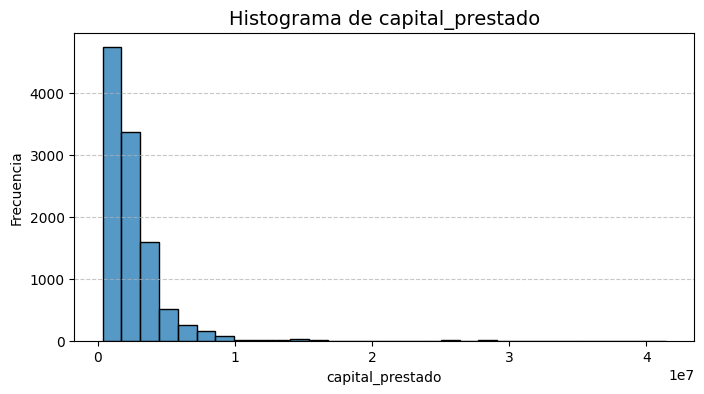

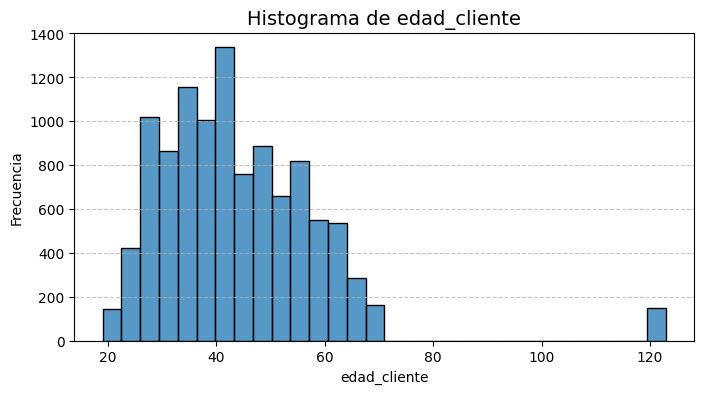

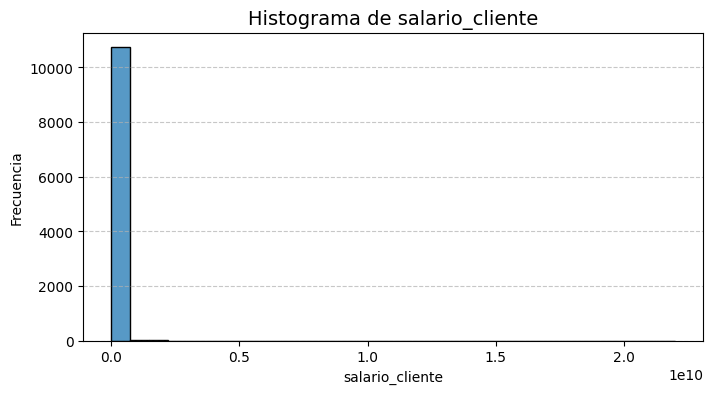

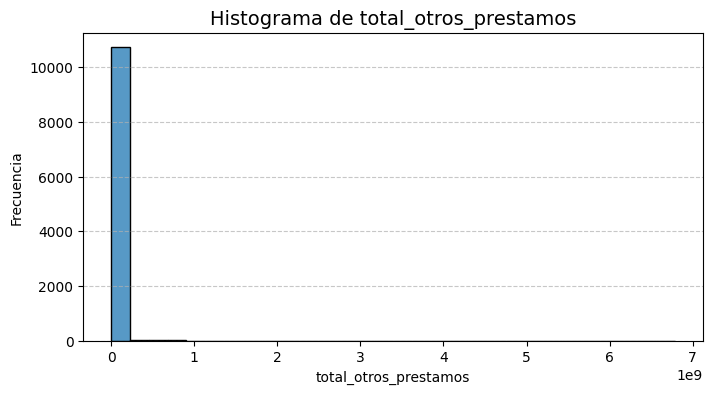

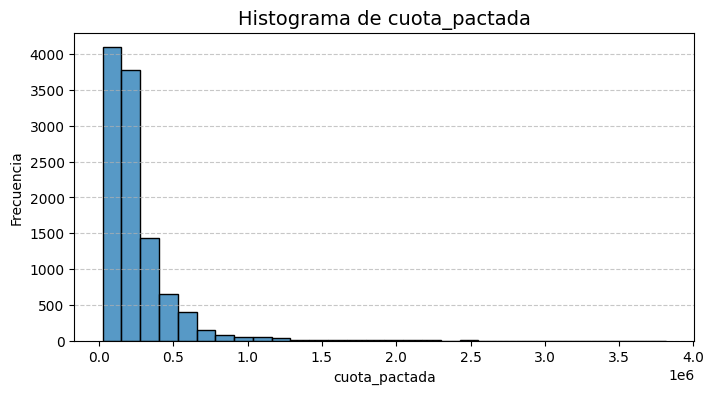

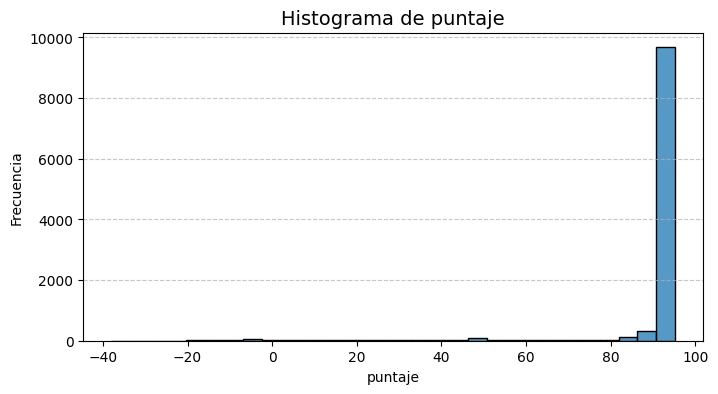

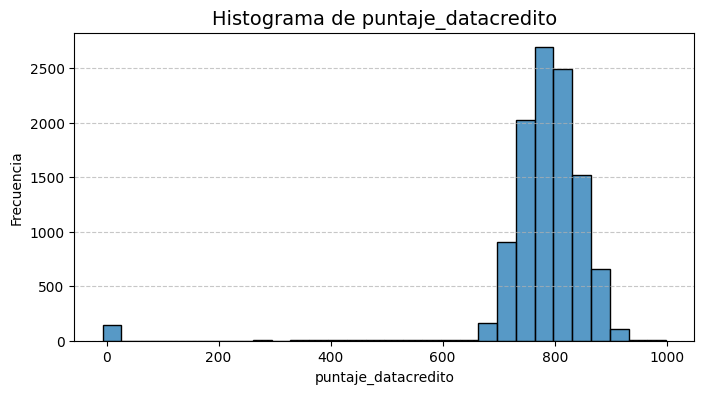

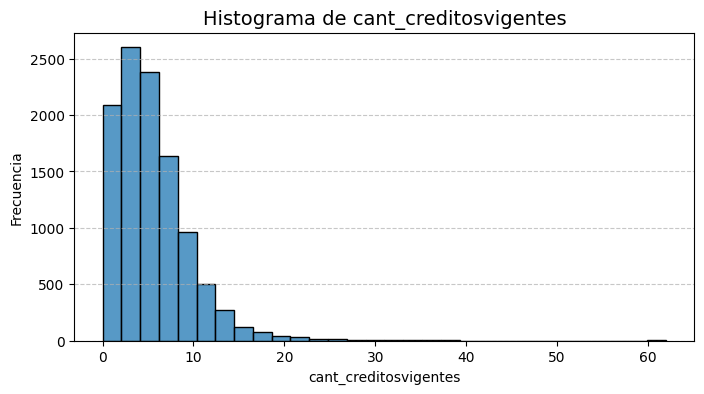

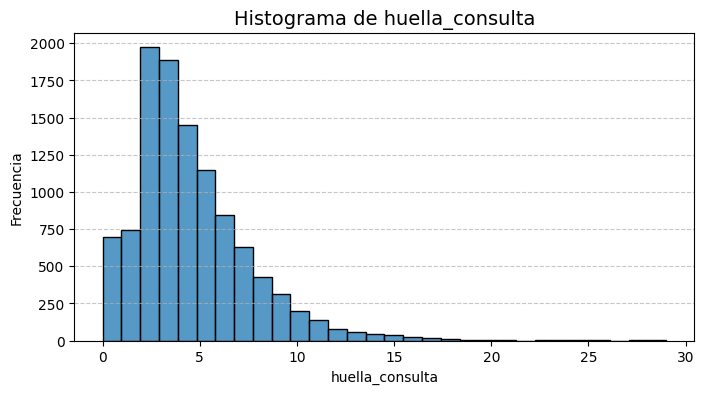

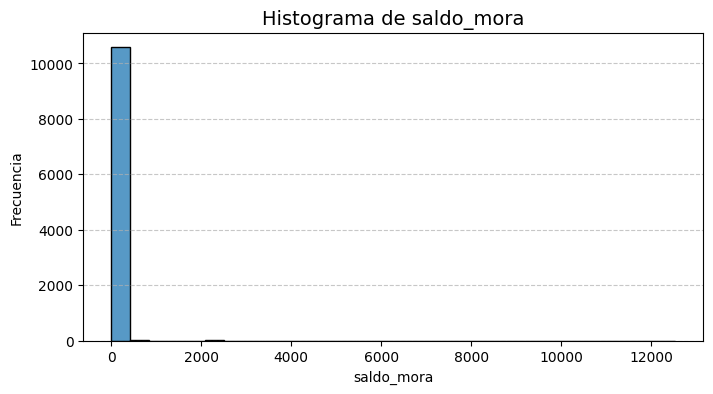

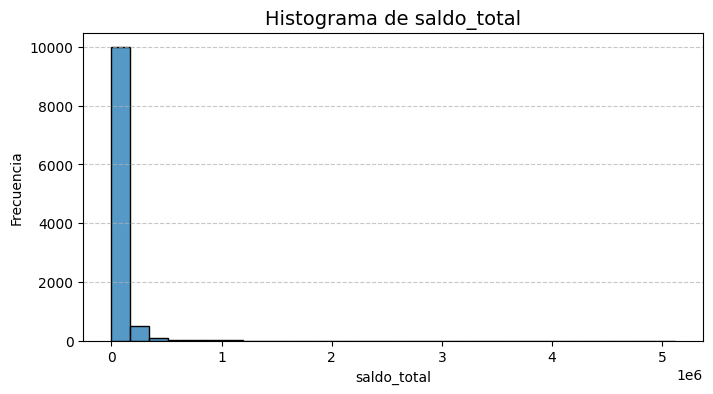

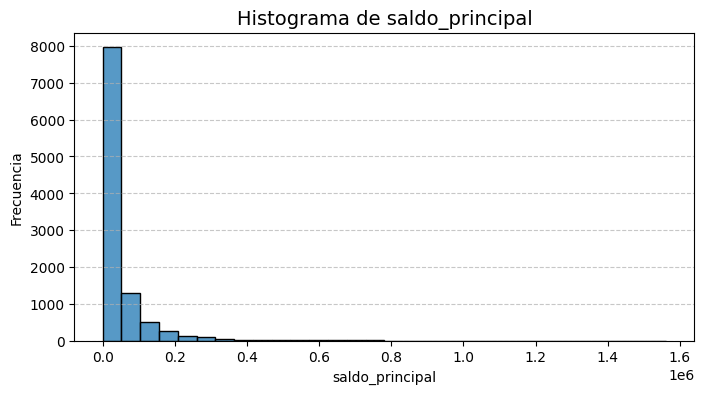

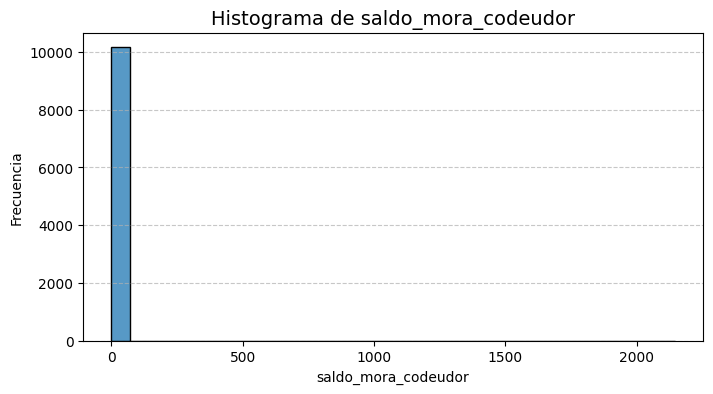

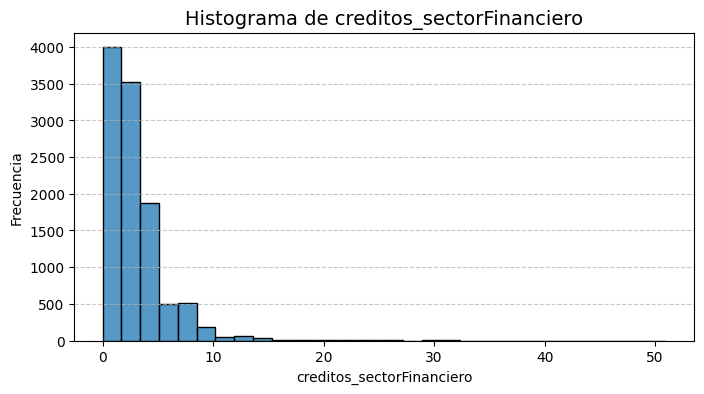

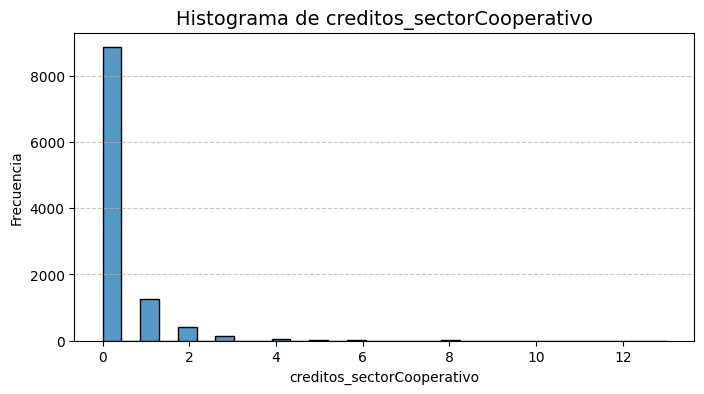

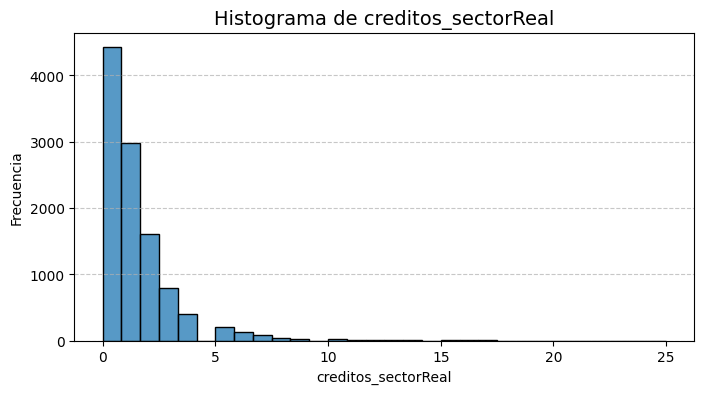

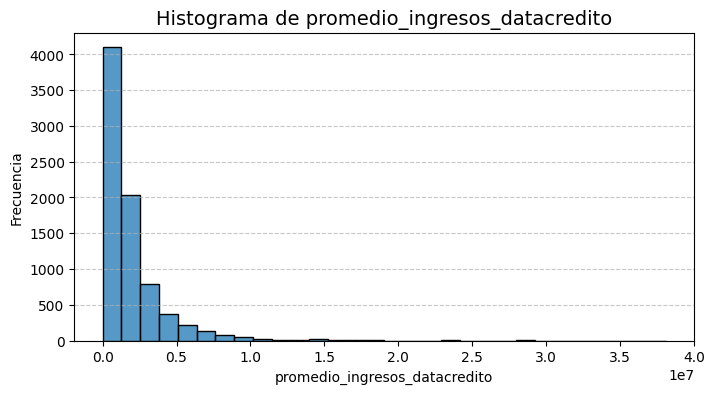

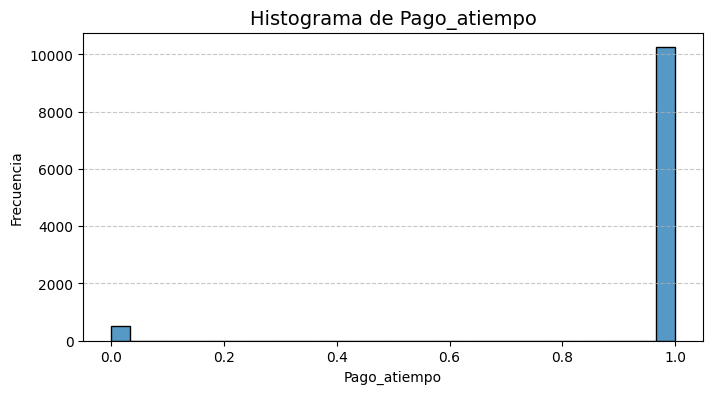

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Recorrer y graficar histogramas
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=30)
    plt.title(f"Histograma de {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

**Capital Prestado:** Distribución sesgada hacia la derecha con la mayoría de préstamos concentrados en valores bajos. Presencia de outliers sugiere diferentes segmentos de clientes.

**Plazo Meses:** Distribución relativamente uniforme con concentración en plazos estándar (12, 24, 36 meses). En términos de cumplimiento, los créditos de corto plazo son más confiables, y el riesgo aumenta en mediano y largo plazo.

**Edad Cliente:** Distribución normal con ligero sesgo hacia edades mayores. Concentración principal entre 30-50 años, típico de población crediticiamente activa.

**Salario Cliente** Fuerte concentración en salarios bajos con cola larga hacia valores altos. Patrón típico de distribución de ingresos en población general.

**Total Otros Préstamos:** Mayoría de clientes sin otros préstamos, con casos aislados de exposiciones múltiples muy altas. Sugiere portfolio principalmente de primeros créditos.

**Cuota Pactada:** Distribución sesgada hacia la derecha con concentración en cuotas bajas. Distribución similar a capital, con mayoría en valores bajos y pocos extremos altos.

**Puntaje:** Altamente concentrado en puntajes entre 80-100.

**Puntaje Datacrédito**: Similar al puntaje anterior con mayor concentración en 800.

**Cantidad Créditos Vigentes:** Fuerte concentración entre 0 - 10. Pocos clientes con múltiples exposiciones, indicando gestión conservadora de riesgo.

**Huella Consulta:** Distribucion sesgada hacia la derecha alta concentracion de personas entre 0 - 5.

**Saldo Mora:** Mayoría de clientes sin mora (valores en cero), con casos aislados de moras significativas.

**Saldo Total:** Gran variabilidad con mediana muy inferior a la media, confirmando concentración en saldos bajos con outliers extremos.

**Saldo Principal:** Patrón similar al saldo total.

**Saldo Mora Codeudor:** Mayoría absoluta en cero, indicando baja utilización de codeudores y/o buen comportamiento de pago conjunto.

**Créditos Sector Financiero:** Distribución concentrada en valores bajos, con mayoría de clientes teniendo pocos o ningún crédito en sector financiero.

**Créditos Sector Cooperativo:** Similar al sector financiero, concentración en valores bajos sugiriendo baja penetración del sector cooperativo.

**Estadísticas Créditos Sector Real:** Baja exposición promedio en sector real, consistente con el perfil de cartera observado.

**Promedio Ingresos Datacrédito:** Distribución sesgada similar al salario cliente.

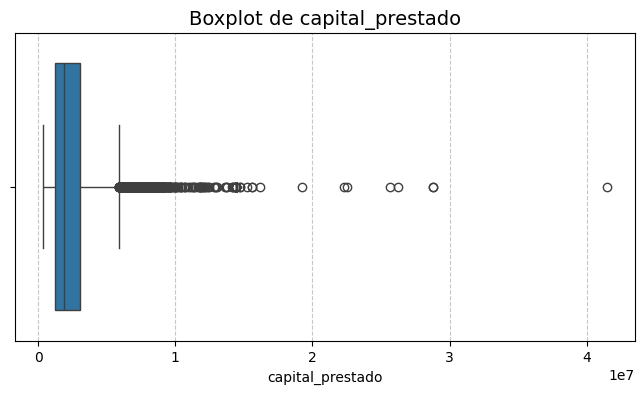

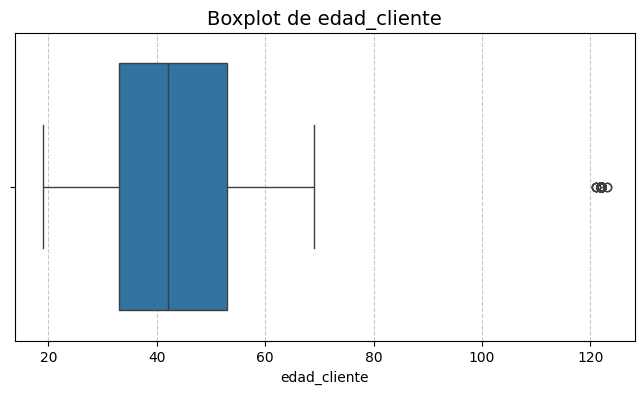

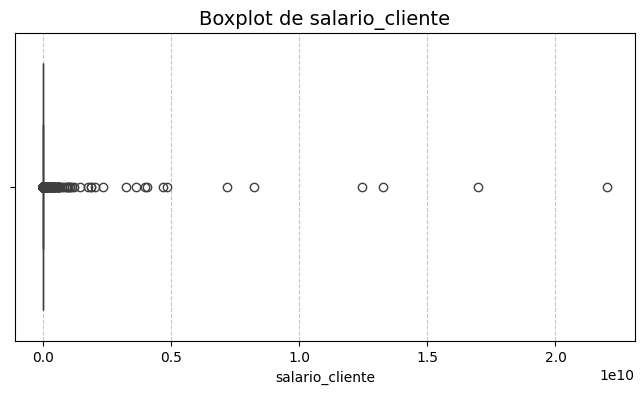

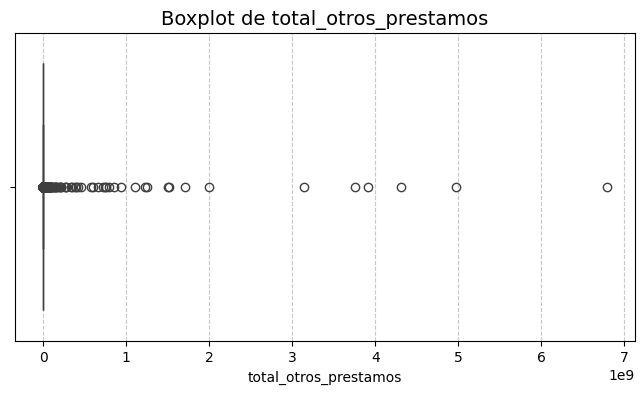

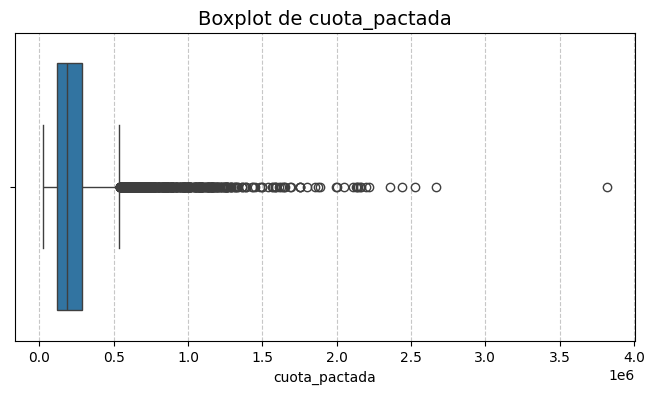

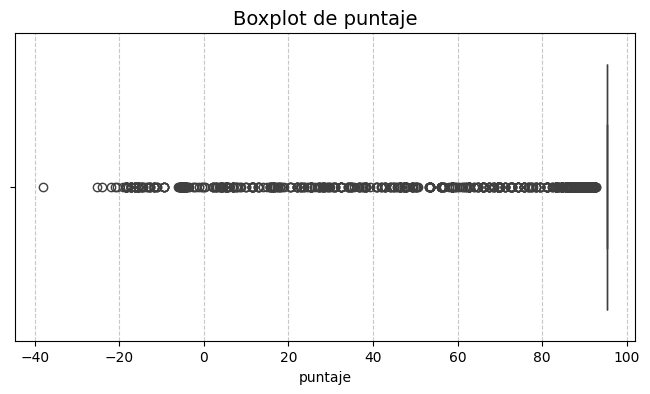

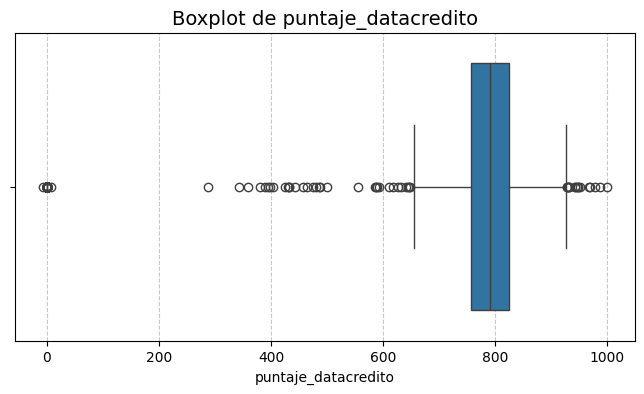

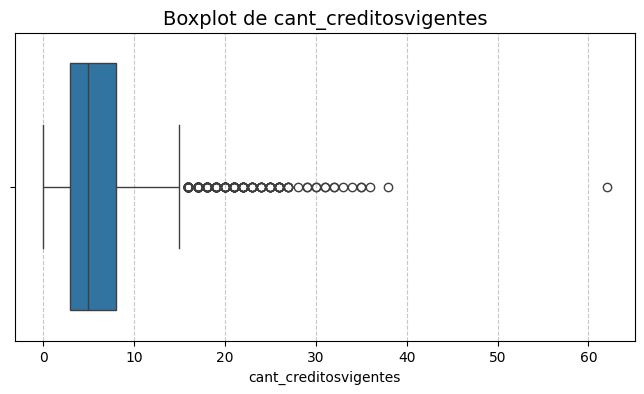

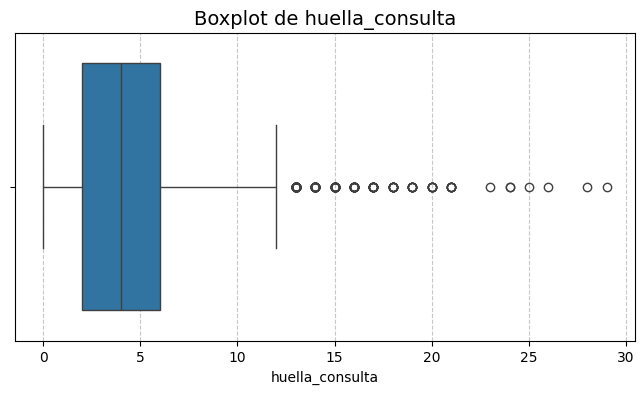

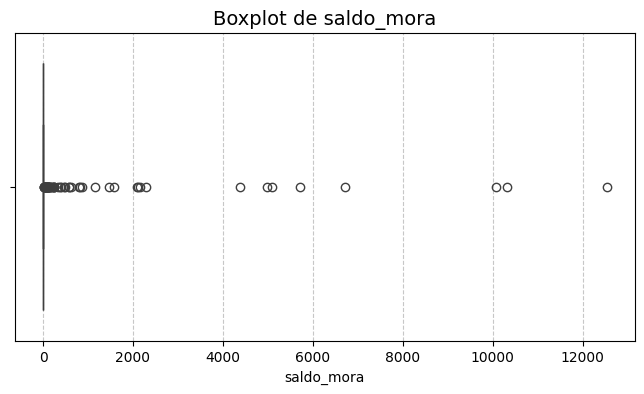

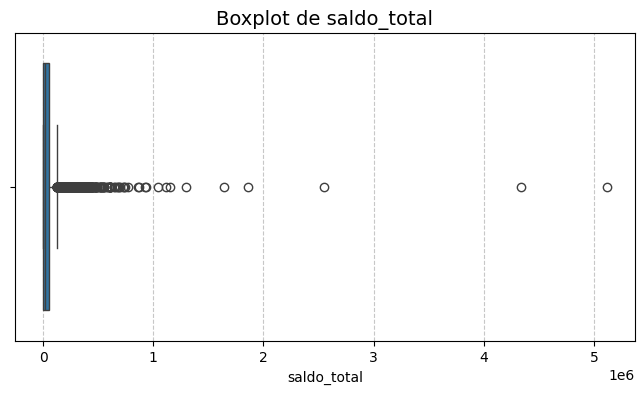

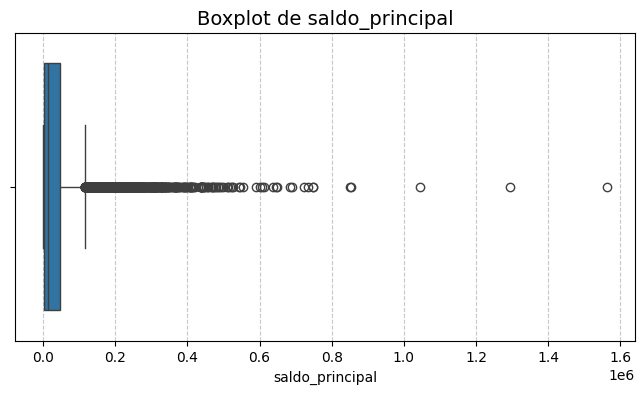

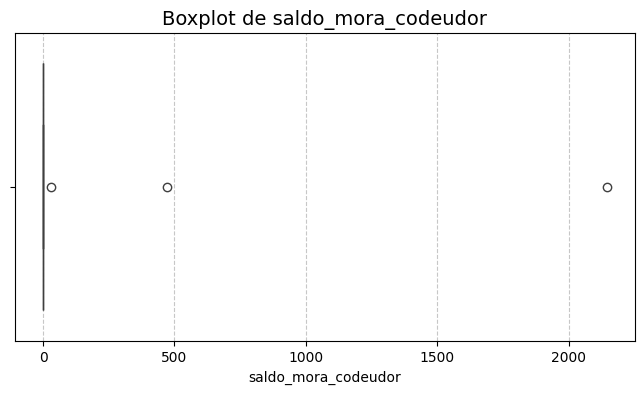

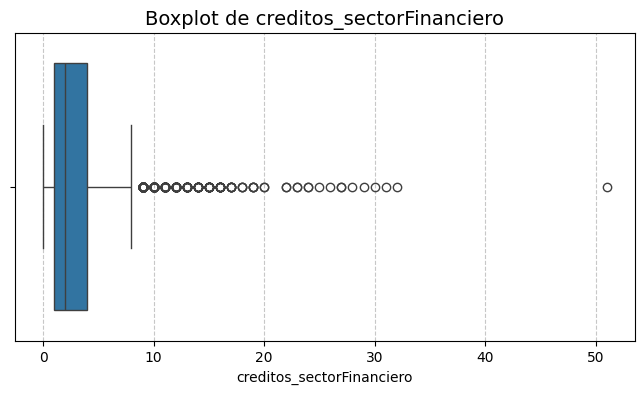

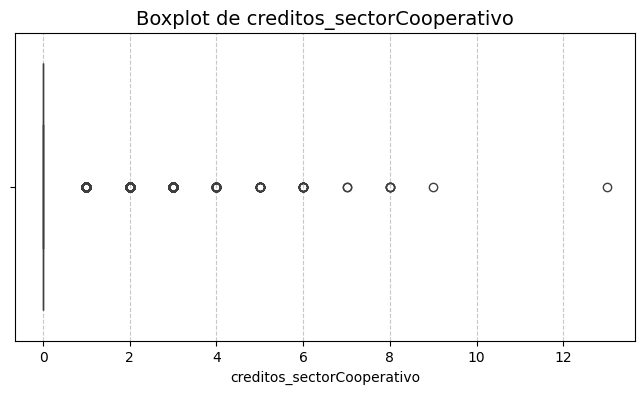

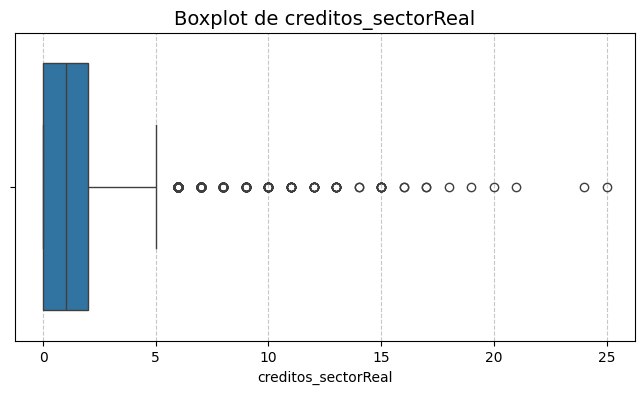

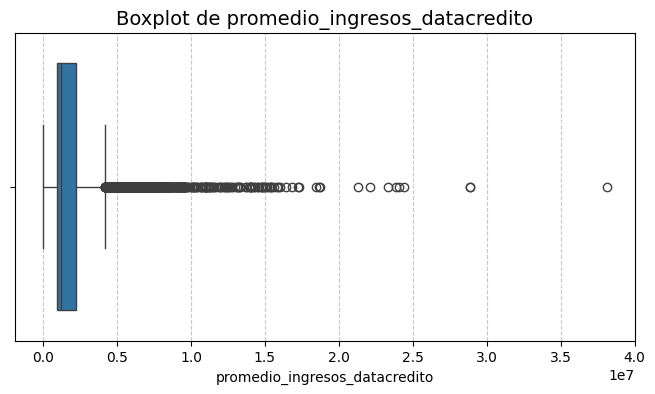

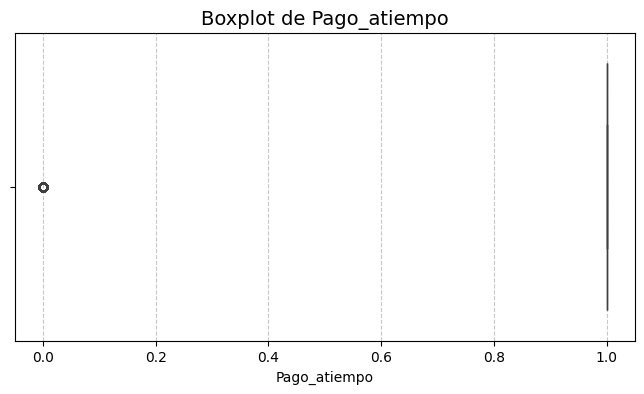

In [20]:
# Filtrar solo columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Recorrer y graficar boxplots
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot de {col}", fontsize=14)
    plt.xlabel(col)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

**Boxplot Capital Prestado**
* Mediana muy baja (~500K) con Q3 alrededor de 2M, indicando que 75% de los préstamos son de monto pequeño-mediano. Outliers extremos hasta 50M+ sugieren préstamos corporativos o hipotecarios. La caja compacta confirma concentración en segmento retail.

**Boxplot Edad Cliente**
* Distribución simétrica con mediana ~40 años. Rango intercuartílico normal (30-50 años) sin outliers extremos, confirmando población crediticia estándar. Los whiskers se extienden apropiadamente hasta los límites naturales de edad crediticia.

**Boxplot Salario Cliente**
* Mediana baja (~2M) con Q3 alrededor de 4M, mostrando concentración en ingresos medios-bajos. Outliers extremos hasta 50M+ indican ejecutivos o empresarios. La asimetría hacia arriba es típica de distribuciones de ingreso.

**Boxplot Total Otros Préstamos**
* Mediana en cero confirma que mayoría de clientes no tienen otros préstamos. Q3 bajo indica que incluso el 75% superior tiene exposiciones limitadas. Outliers significativos sugieren clientes con múltiples obligaciones financieras.

**Boxplot Cuota Pactada**
* Mediana baja (~200K) consistente con ingresos y montos prestados observados. La proporción cuota/ingreso implícita parece conservadora. Outliers extremos corresponden a los préstamos de mayor monto identificados previamente.

**Boxplot Cantidad Créditos Vigentes**
* Mediana en 1-2 créditos con Q3 alrededor de 3, indicando gestión conservadora de exposición múltiple. Pocos outliers con muchos créditos sugieren casos especiales o clientes premium con mayor capacidad de endeudamiento.

**Boxplot Saldos (Variables múltiples)**
* Todos muestran patrón similar: medianas bajas, alta concentración en valores pequeños y outliers extremos. Confirma que el portfolio está dominado por créditos pequeños con casos aislados de exposiciones significativas. 

In [21]:
# Filtrar numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop("Pago_atiempo")

# Generar tablas pivote
for col in num_cols:
    tabla = df.pivot_table(values=col, index="Pago_atiempo", aggfunc=["mean", "median", "min", "max"])
    print(f"\n📊 Tabla pivote para {col} con respecto a Pago_atiempo:")
    print(tabla)


📊 Tabla pivote para capital_prestado con respecto a Pago_atiempo:
                         mean           median              min  \
             capital_prestado capital_prestado capital_prestado   
Pago_atiempo                                                      
0                2.781774e+06        2268000.0         408000.0   
1                2.415844e+06        1908000.0         360000.0   

                          max  
             capital_prestado  
Pago_atiempo                   
0                  11808000.0  
1                  41444152.8  

📊 Tabla pivote para edad_cliente con respecto a Pago_atiempo:
                     mean       median          min          max
             edad_cliente edad_cliente edad_cliente edad_cliente
Pago_atiempo                                                    
0               41.772994         38.0           20          122
1               44.060201         42.0           19          123

📊 Tabla pivote para salario_cliente con respecto

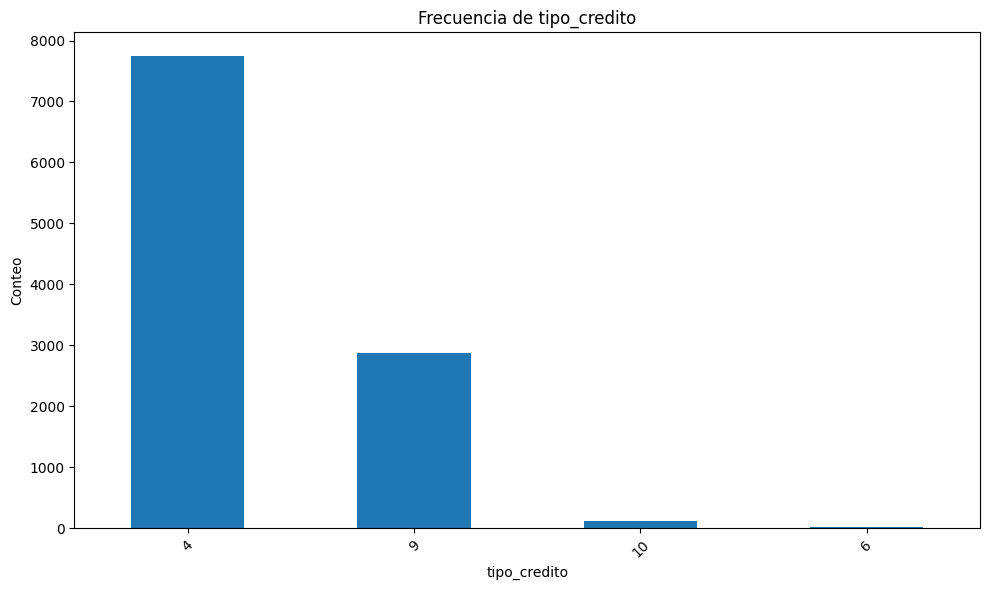

Value counts for tipo_credito:
tipo_credito
4     7747
9     2876
10     116
6       21
Name: count, dtype: int64

--------------------------------------------------


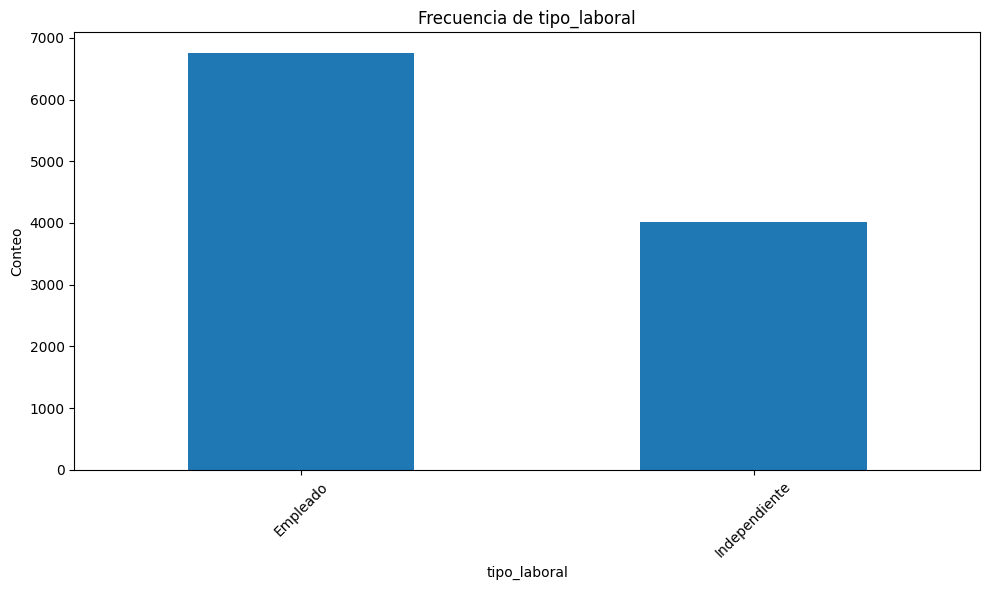

Value counts for tipo_laboral:
tipo_laboral
Empleado         6752
Independiente    4008
Name: count, dtype: int64

--------------------------------------------------


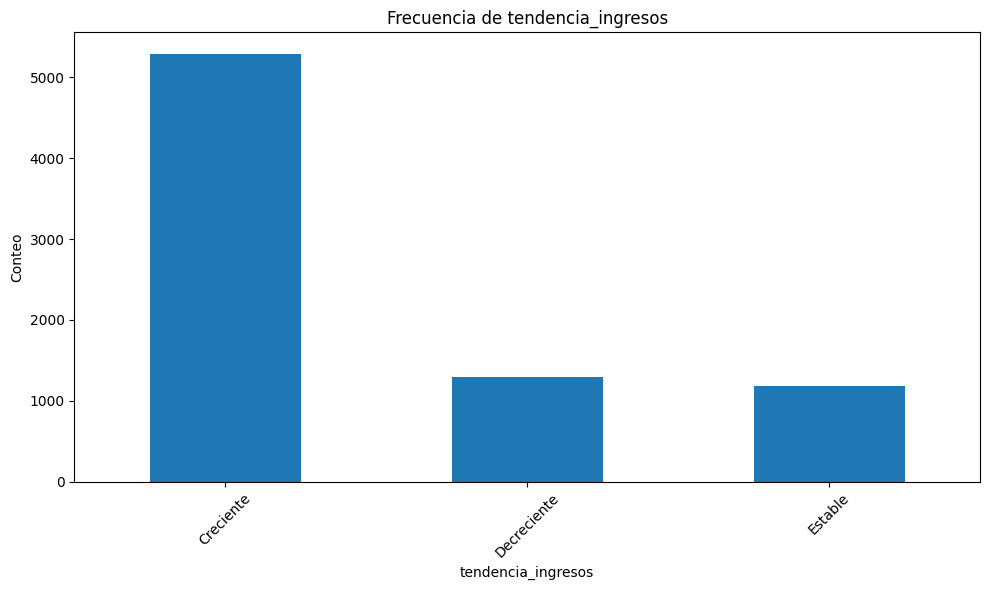

Value counts for tendencia_ingresos:
tendencia_ingresos
Creciente      5293
Decreciente    1291
Estable        1187
Name: count, dtype: int64

--------------------------------------------------


In [22]:
# Buscar columnas categóricas directamente
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns



for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")
    print("-" * 50)

**Tendencia ingresos**
Fuerte desbalance con una categoría dominante representando ~80% de los casos.

**Tipo credito**

* Existe una categoría claramente dominante (probablemente consumo o libre inversión).

* Las demás categorías aparecen en proporciones mucho menores.

* Esto podría generar desbalance en las clases y requerir técnicas de balanceo o agrupación.

**Tipo laboral**

* Mayoría de clientes son empleados, mientras que los independientes representan un grupo menor.

* Podría ser relevante porque los independientes suelen tener mayor probabilidad de incumplimiento.

**Analisis bivariable**

Nos interesa revisar cada variable respecto a la objetivo. Para las variables numéricas boxplot utilizando como hue o columna la variable objetivo. Hisplot con hue=columna objetivo

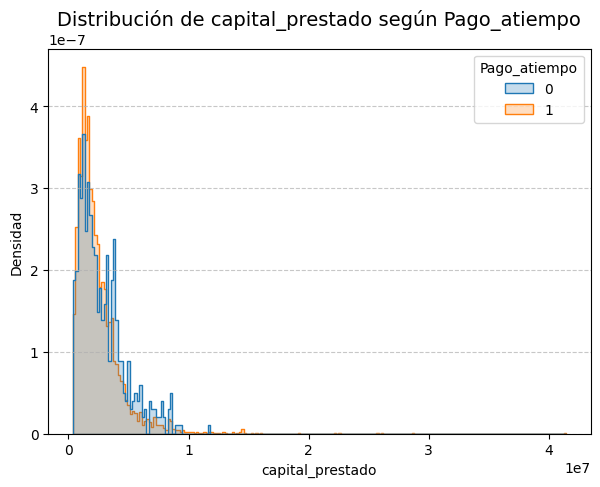

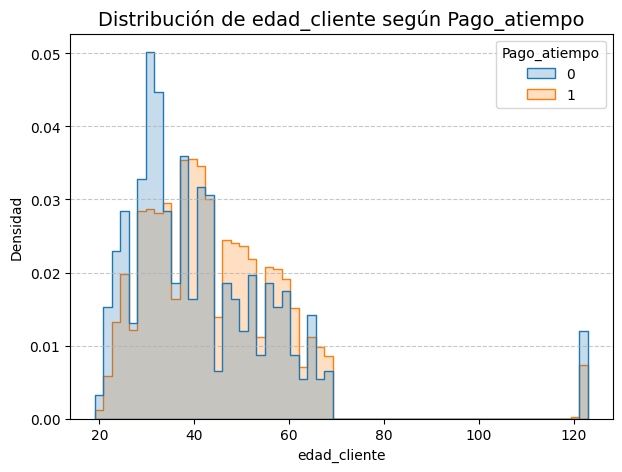

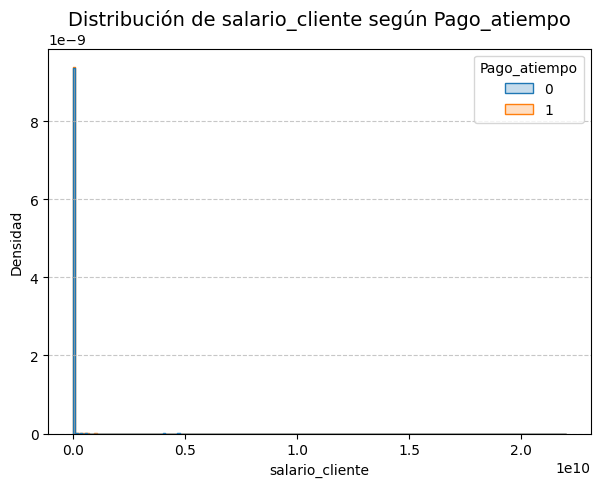

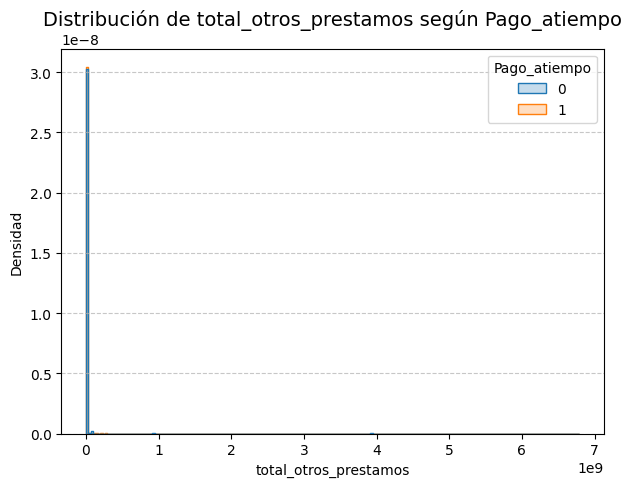

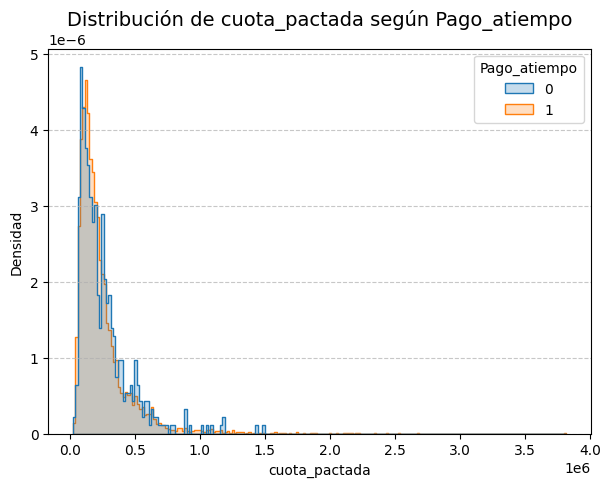

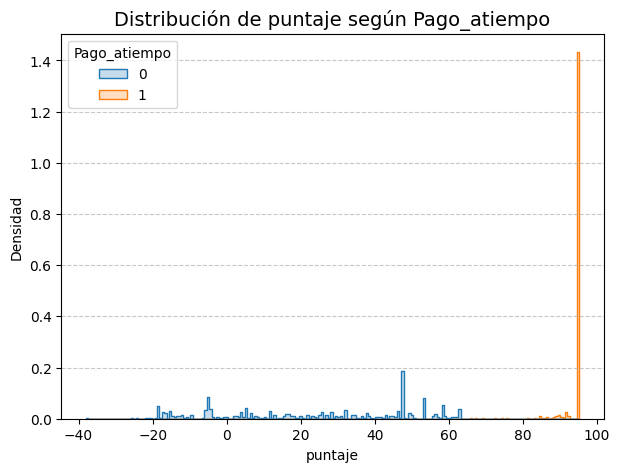

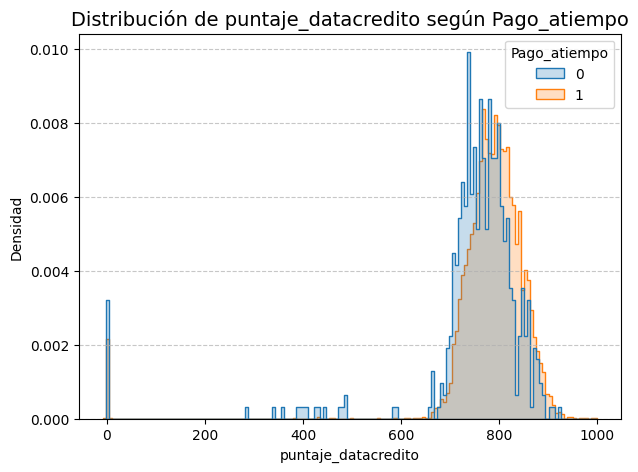

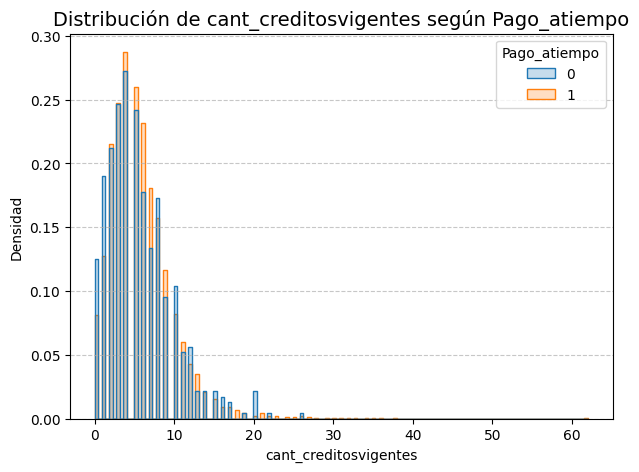

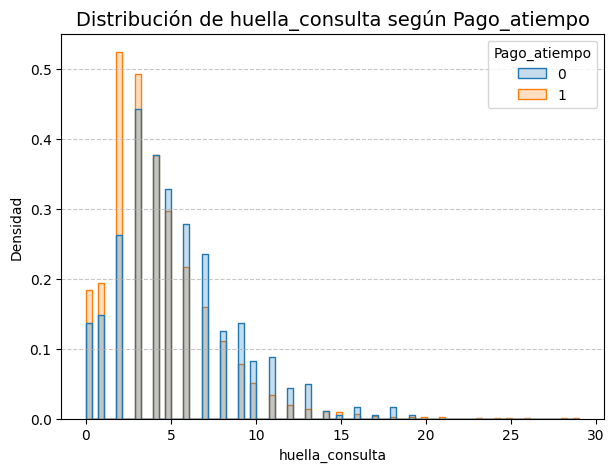

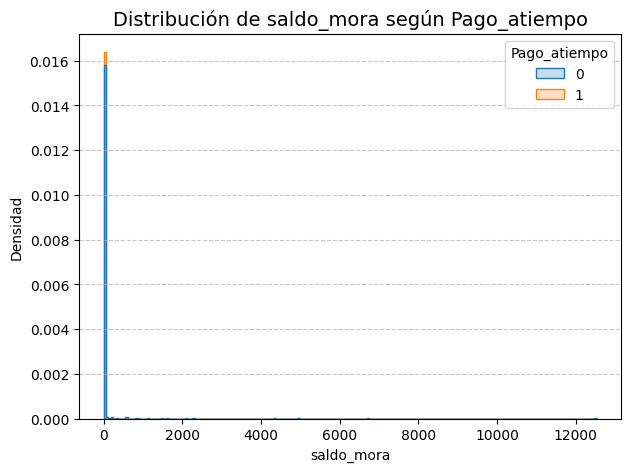

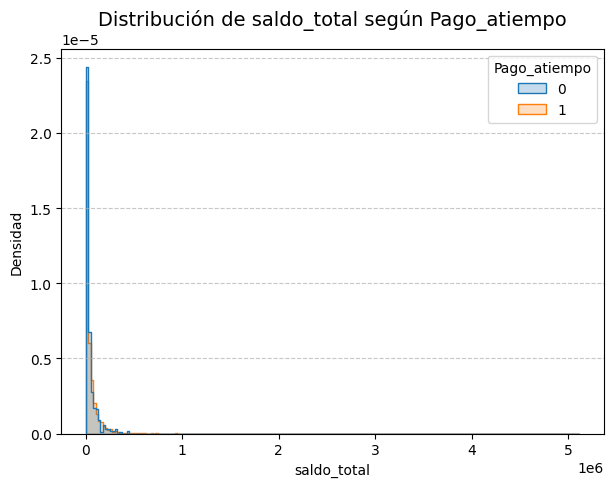

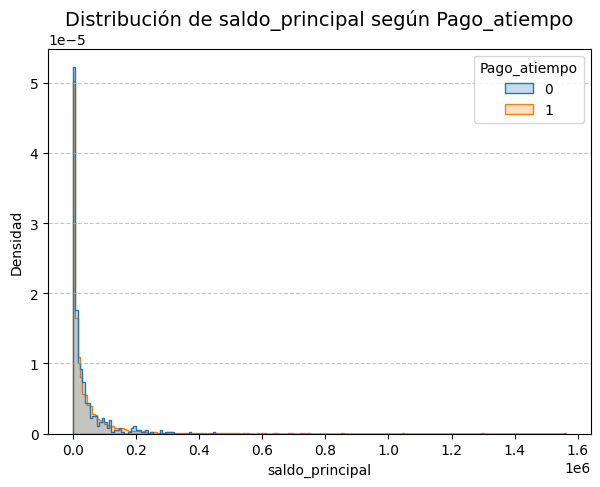

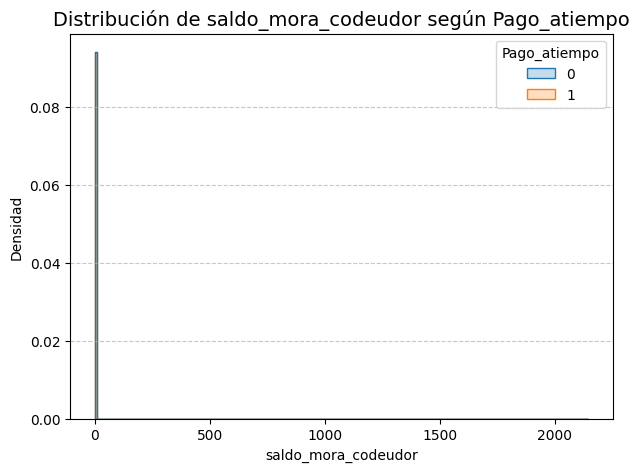

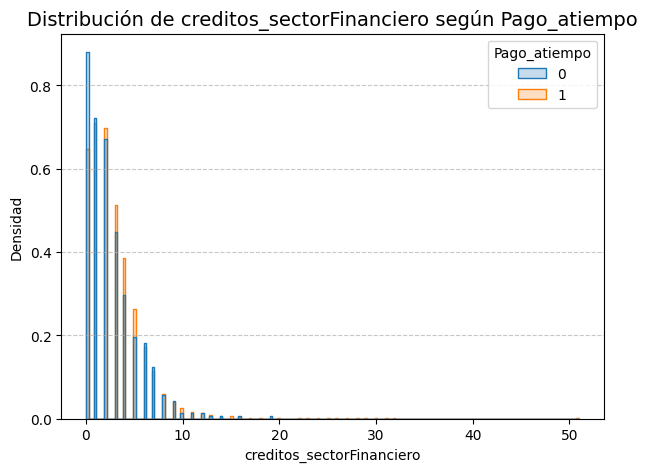

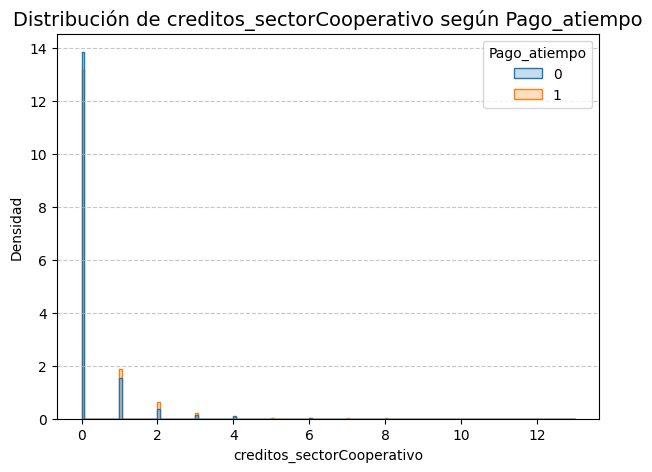

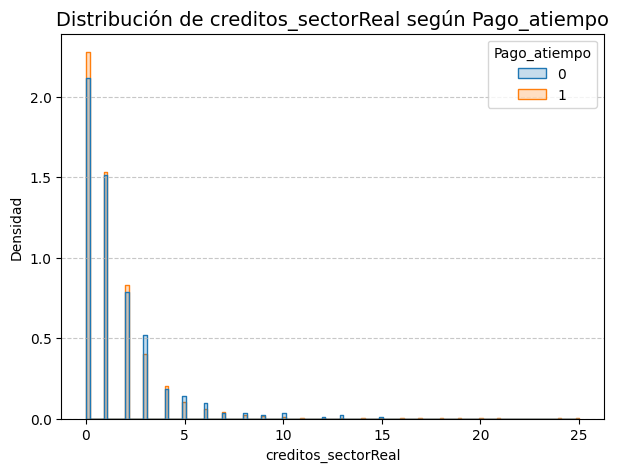

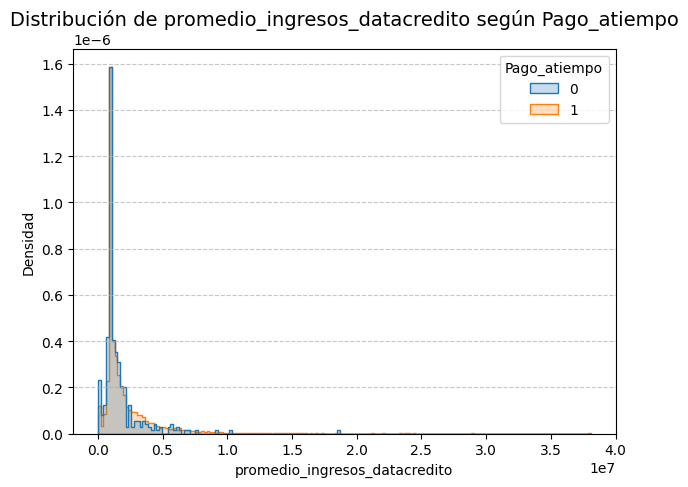

In [23]:
# Variables numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).drop(columns=["Pago_atiempo"]).columns
for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.histplot(data=df, x=col, hue="Pago_atiempo", element="step", stat="density", common_norm=False)
    plt.title(f"Distribución de {col} según Pago_atiempo", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

**Capital Prestado vs Pago a Tiempo:**
* Los clientes que no pagan a tiempo tienden a tener préstamos de montos más altos. La distribución muestra mayor dispersión en el grupo de no pagadores, sugiriendo que montos elevados aumentan el riesgo de incumplimiento.

**Plazo Meses vs Pago a Tiempo:**
* Los buenos pagadores se concentran en plazos medios (12-36 meses), mientras que los malos pagadores muestran mayor variabilidad. Plazos muy largos parecen asociarse con mayor riesgo de incumplimiento.

**Edad Cliente vs Pago a Tiempo:**
* Diferencia notable: clientes que pagan a tiempo tienden a ser mayores (concentración 35-50 años). Los más jóvenes muestran mayor propensión al incumplimiento, confirmando edad como factor de riesgo.

**Salario Cliente vs Pago a Tiempo:**
* Los buenos pagadores muestran distribución más concentrada en ingresos medios-altos. Los malos pagadores tienen mayor dispersión, incluyendo casos de ingresos altos que no pagan, sugiriendo otros factores de riesgo.

**Total Otros Préstamos vs Pago a Tiempo:**
* Clara diferenciación: malos pagadores tienen significativamente más exposición en otros préstamos. Alta correlación entre sobreendeudamiento y riesgo de incumplimiento.

**Cuota Pactada vs Pago a Tiempo:**
* Los buenos pagadores se concentran en cuotas bajas-medias. Cuotas muy altas se asocian con mayor riesgo, probablemente por compromiso excesivo de la capacidad de pago.

**Puntaje vs Pago a Tiempo:**
* Diferenciación muy clara: buenos pagadores tienen scores superiores (600-800), malos pagadores concentrados en scores bajos (300-500). Confirma el poder predictivo del scoring crediticio.

**Puntaje Datacrédito vs Pago a Tiempo:**
* Similar al puntaje anterior pero con diferenciación aún más marcada. Los buenos pagadores están claramente en rangos altos (700+), validando la calidad de esta fuente de información.

**Cantidad Créditos Vigentes vs Pago a Tiempo:**
* Los buenos pagadores tienden a tener 1-2 créditos, mientras que los malos pagadores muestran mayor dispersión incluyendo casos con muchos créditos vigentes. Sobreendeudamiento como indicador de riesgo.

**Huella Consulta vs Pago a Tiempo:**
* Los malos pagadores tienen más consultas crediticias, sugiriendo búsqueda desesperada de crédito. Los buenos pagadores muestran comportamiento más estable con pocas consultas.

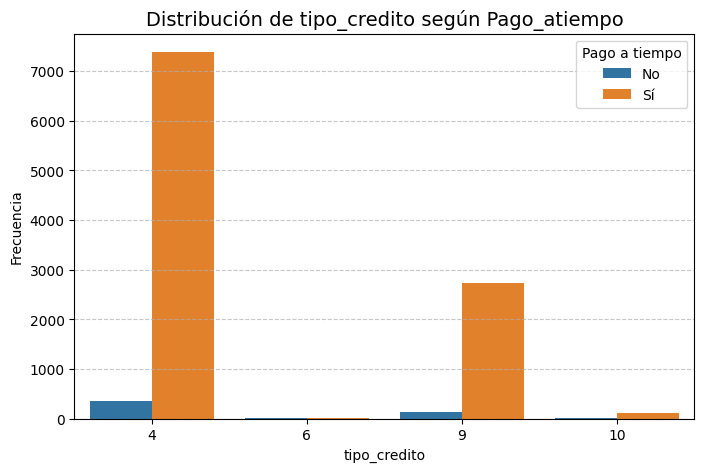

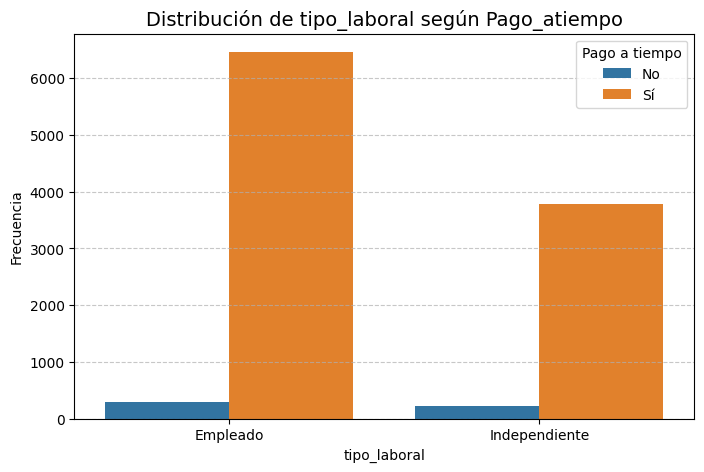

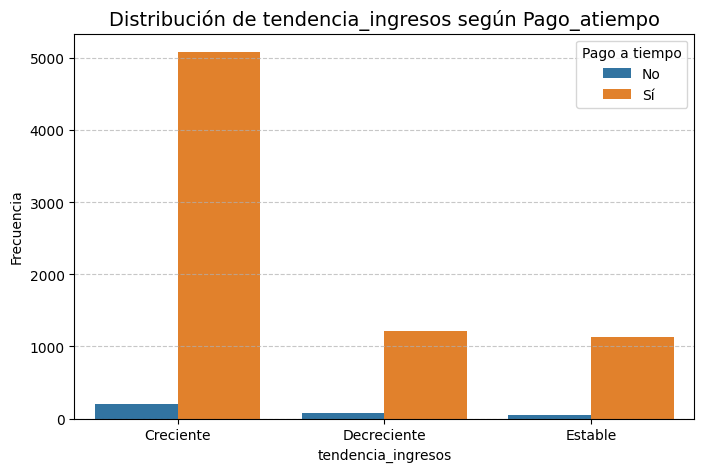

In [24]:
# Filtrar columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Recorrer y graficar
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue="Pago_atiempo")
    plt.title(f"Distribución de {col} según Pago_atiempo", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.legend(title="Pago a tiempo", labels=["No", "Sí"])
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

**Tipo 4 y 9:**

* 4.7% de incumplimiento en ambos tipos

* 95.3% pagan a tiempo - Performance sólida

* Productos crediticios de riesgo controlado

**Tipo 6 (Riesgo Alto):**

* 42.9% de incumplimiento - Significativamente mayor

* 57.1% pagan a tiempo - Performance deficiente


**Tipo 10**

* 2.6% de incumplimiento - Excelente resultado
* 97.4% pagan a tiempo


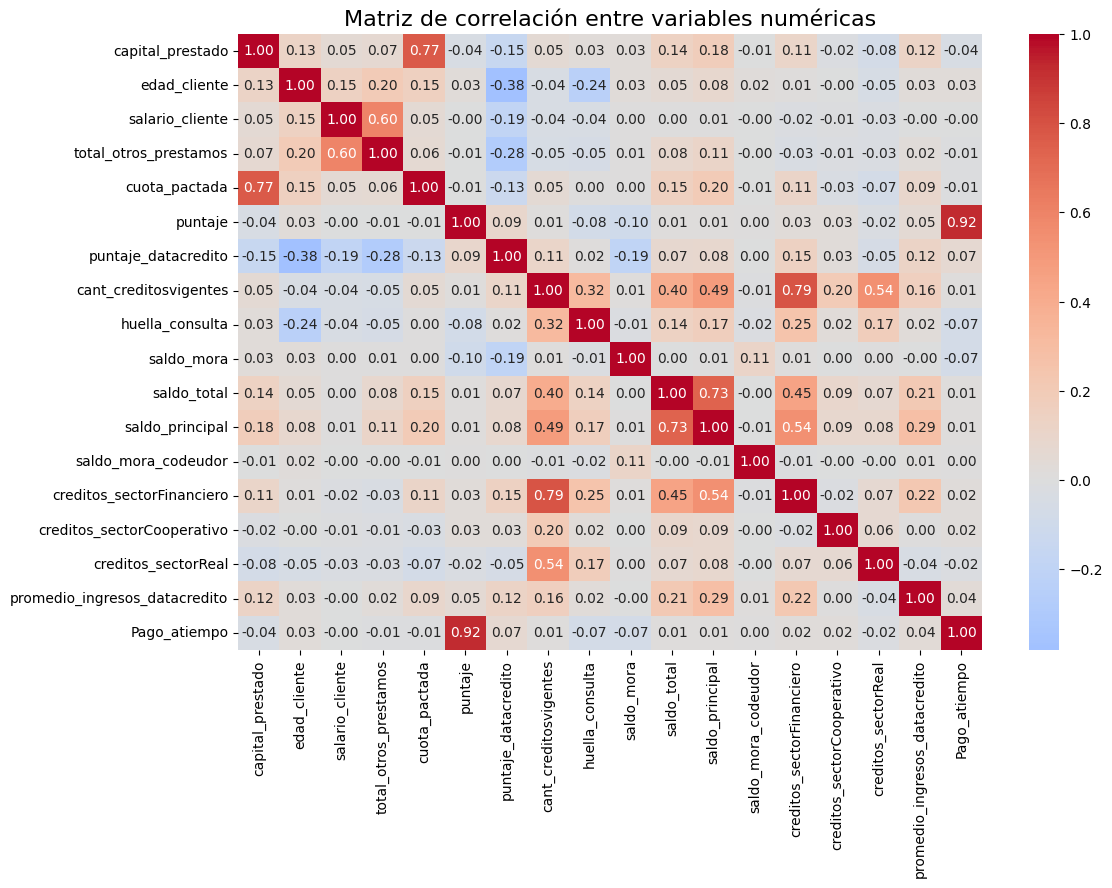

In [25]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables numéricas", fontsize=16)
plt.show()

**Correlaciones más fuertes (≥ 0.7):**

*Correlaciones positivas muy altas*
* Pago_atiempo con puntaje (0.92) - Los clientes que pagan a tiempo tienen mejores puntajes crediticios

* creditos_sectorFinanciero con cant_creditosvigentes (0.79) - Más créditos en sector financiero se asocia con más créditos vigentes

* saldo_total con saldo_principal (0.73) - Relación directa entre saldos totales y principales

**Correlaciones moderadas (0.4-0.7):**

* salario_cliente con total_otros_prestamos (0.60) - Salarios más altos se asocian con más préstamos

* creditos_sectorReal con cant_creditosvigentes (0.54) - Créditos en sector real correlacionan con cantidad de créditos vigentes

* saldo_principal con creditos_sectorFinanciero (0.54)

**Correlaciones negativas notables:**

* edad_cliente con puntaje_datacredito (-0.38) - Los clientes mayores tienden a tener puntajes más bajos

* cuota_pactada con puntaje_datacredito (-0.28) - Cuotas más altas se asocian con puntajes más bajos

* huellas_consulta con edad_cliente (-0.24) - Los clientes mayores tienen menos consultas de crédito


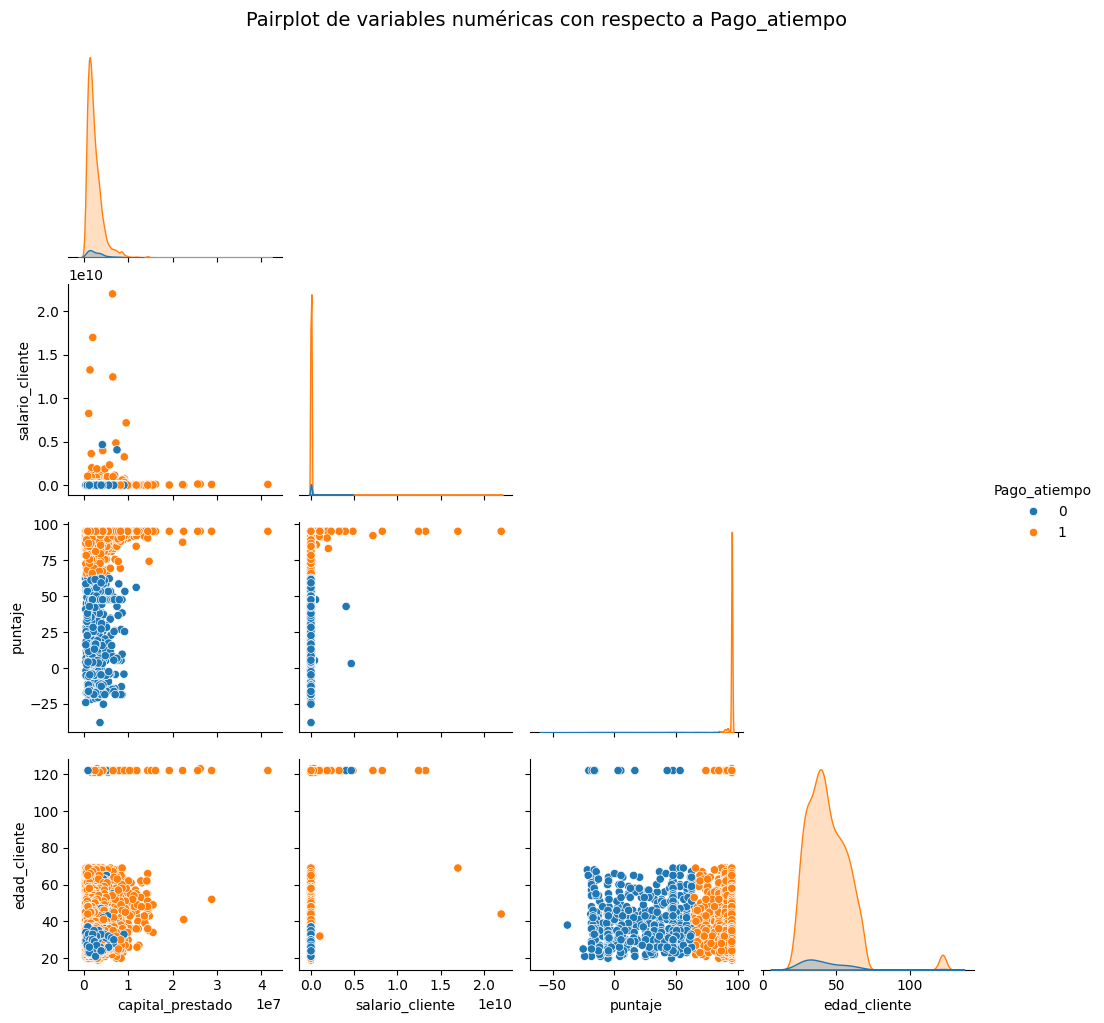

In [26]:
sns.pairplot(df, vars=["capital_prestado", "salario_cliente", "puntaje", "edad_cliente"], 
             hue="Pago_atiempo", diag_kind="kde", corner=True)
plt.suptitle("Pairplot de variables numéricas con respecto a Pago_atiempo", y=1.02, fontsize=14)
plt.show()


## Capital Prestado vs Salario Cliente
**Separación clara**: Los buenos pagadores (naranja) se concentran en montos bajos-medios con salarios proporcionales. Los malos pagadores (azul) muestran mayor dispersión, incluyendo casos de préstamos altos con salarios bajos (riesgo evidente).

## Capital Prestado vs Puntaje
**Discriminación fuerte**: Buenos pagadores tienen puntajes consistentemente altos (>600) independientemente del monto. Malos pagadores concentrados en puntajes bajos (<500), especialmente con montos altos.

## Capital Prestado vs Edad
**Patrón de riesgo por edad**: Clientes jóvenes (<30) con préstamos altos predominantemente azules (mayor riesgo). Buenos pagadores se distribuyen más uniformemente en edad pero con concentración en 35-55 años.

## Salario vs Puntaje
**Correlación de calidad crediticia**: Cluster denso de buenos pagadores en la zona de salarios medios-altos + puntajes altos. Malos pagadores dispersos, algunos con salarios altos pero puntajes bajos (red flag).

## Salario vs Edad
**Estabilidad por madurez**: Buenos pagadores muestran correlación positiva salario-edad (progresión natural de carrera). Malos pagadores más erráticos en esta relación.

## Puntaje vs Edad
**Separación más clara del pairplot**: Línea de separación casi perfecta. Buenos pagadores dominan rangos de puntaje alto, concentrados en edades maduras. La edad temprana + puntaje bajo = riesgo muy alto.

In [27]:
pd.crosstab([df["tipo_laboral"], df["tipo_credito"]], df["Pago_atiempo"], normalize="index") * 100


Pago_atiempo                        0          1
tipo_laboral  tipo_credito                      
Empleado      4              4.136975  95.863025
              6             42.857143  57.142857
              9              4.364090  95.635910
              10             2.666667  97.333333
Independiente 4              5.714286  94.285714
              9              5.188679  94.811321
              10             2.439024  97.560976


### Patrones por Tipo de Crédito:

#### **Tipo 4 (Empleados vs Independientes):**
- **Empleados**: 4.14% incumplimiento vs **Independientes**: 5.71%
- Los independientes tienen **38% más riesgo** en este producto
- Diferencia moderada pero consistente con el patrón general

#### **Tipo 6 (Alto Riesgo - Solo Empleados):**
- **42.86% de incumplimiento** - Confirma que es el producto más riesgoso
- No hay independientes en este tipo de crédito (posible restricción de política)

#### **Tipo 9:**
- **Empleados**: 4.36% vs **Independientes**: 5.19%
- Diferencia pequeña, ambos con buen desempeño

#### **Tipo 10:**
- **Empleados**: 2.67% vs **Independientes**: 2.44%
- **Sorpresa**: Independientes ligeramente mejor que empleados
- Posible producto especializado para independientes

#### **Consistencia del Patrón:**
En la mayoría de productos, los **independientes tienen mayor riesgo**, excepto en el Tipo 10 donde la diferencia es mínima.

#### **Implicaciones de Pricing:**
Los independientes podrían justificar **tasas ligeramente superiores** en la mayoría de productos, excepto Tipo 10.


In [28]:
pd.crosstab([df["tendencia_ingresos"],df["tipo_laboral"]], df["Pago_atiempo"], normalize="index") * 100

Pago_atiempo                             0          1
tendencia_ingresos tipo_laboral                      
Creciente          Empleado       3.565851  96.434149
                   Independiente  4.824259  95.175741
Decreciente        Empleado       5.869797  94.130203
                   Independiente  7.344633  92.655367
Estable            Empleado       4.489164  95.510836
                   Independiente  4.805915  95.194085


### Patrones por Tendencia de Ingresos:

#### **Ingresos Crecientes (Mejor Performance):**
- **Empleados**: 3.56% incumplimiento - **Excelente**
- **Independientes**: 4.82% incumplimiento - **Bueno**
- **Gap**: Independientes 35% más riesgo, pero ambos en rangos buenos

#### **Ingresos Decrecientes (Mayor Riesgo):**
- **Empleados**: 5.87% incumplimiento - **Regular**
- **Independientes**: 7.34% incumplimiento - **Alto riesgo**
- **Gap**: Independientes 25% más riesgo, ambos preocupantes

#### **Ingresos Estables (Performance Intermedia):**
- **Empleados**: 4.89% incumplimiento - **Aceptable**
- **Independientes**: 4.80% incumplimiento - **Aceptable**
- **Sorpresa**: Independientes ligeramente mejor que empleados


#### **Jerarquía de Riesgo:**
1. **Menor riesgo**: Ingresos crecientes + Empleado (3.56%)
2. **Riesgo bajo**: Ingresos crecientes + Independiente (4.82%)
3. **Riesgo medio**: Ingresos estables (ambos ~4.8%)
4. **Riesgo alto**: Ingresos decrecientes + Empleado (5.87%)
5. **Mayor riesgo**: Ingresos decrecientes + Independiente (7.34%)

#### **Patrones Contraintuitivos:**
- Con ingresos **estables**, los independientes son ligeramente **menos riesgosos** que empleados
- La **tendencia de ingresos es más predictiva** que el tipo laboral


#### **Para Políticas:**
- **Rechazar/encarecer**: Independientes con ingresos decrecientes
- **Promover**: Cualquier perfil con ingresos crecientes
- **Reevaluar**: Ingresos estables requieren análisis adicional



In [33]:
df.to_csv("C:/Users/jose5/Proyecto-MLops/mlops_pipeline/df_post_eda.csv", index=False)